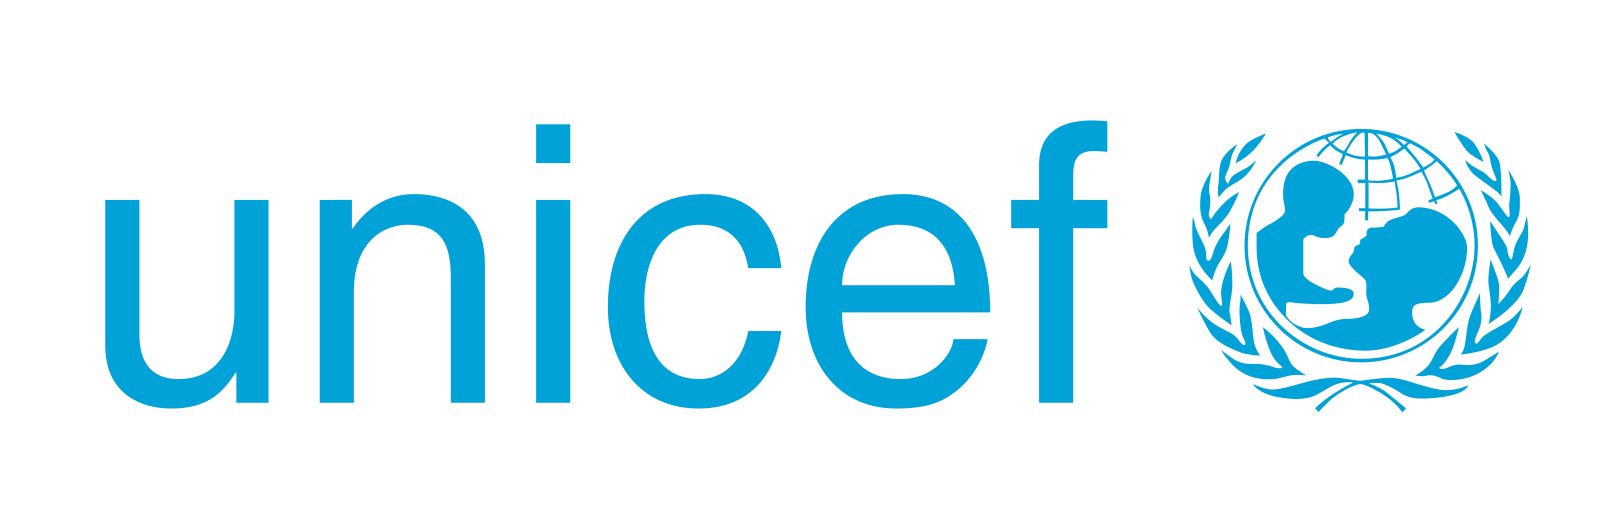

## Общая информация

Рассматривается один из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.  
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Чтобы определиться с параметрами будущей модели (предсказывающей результаты госэкзамена по математике для каждого ученика), необходимо провести **разведывательный анализ данных** и составить отчёт по его результатам.

## Первичная обработка данных

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

'''функция для подсчета всех значений'''


def count_val(column):
    return pd.DataFrame(students[column].value_counts(dropna=True))


'''функция для подсчета пропущенных значений и их процента от общего числа значений'''


def missing_val(column):
    # считаем все пропущенные значения
    sum_null = students[column].isnull().sum()
    # считаем процент от общего количества
    percent = 100 * students[column].isnull().sum() / len(students[column])
    return pd.DataFrame({'Пропущенные значения': sum_null, '% от Общего Числа': percent}, index=['столбец'])


def missing_table(df):
    mis_val = df.isnull().sum()
    percent = 100 * df.isnull().sum() / len(df)
    mis_table = pd.DataFrame(
        {'Missing Values': mis_val, '% of Total Values': percent})
    return mis_table


'''функция для вывода краткой описательной статистики'''


def desc_stat(column):
    IQR = students[column].quantile(0.75) - students[column].quantile(0.25)
    perc25 = students[column].quantile(0.25)
    perc75 = students[column].quantile(0.75)
    print('25-й перцентиль: {}'.format(perc25),
          '\n75-й перцентиль: {}'.format(perc75),
          '\nIQR: {}'.format(IQR),
          '\nГраницы выбросов: [{f}, {l}]'.format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


'''функция, выводящая средние показатели: mean, median, mode'''


def mid_val(column):
    median = students[column].median()
    mode = students[column].mode()
    mean = students[column].mean()
    return display(pd.DataFrame({'Медиана': median, 'Среднее': mean, 'Мода': mode}))


'''функция, выводящая график плотности распределения переменных (boxplot)'''


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])], palette="Blues",
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


'''Функция, оценивающая статистическую разницу номинативных признаков, с помощью теста Стьюдента'''


def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'].dropna(),
                     students.loc[students.loc[:, column] == comb[1], 'score'].dropna(), equal_var=False).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break


binary = ['schoolsup', 'famsup', 'paid', 'activities',
          'nursery', 'higher', 'internet', 'romantic', 'traveltime']
categorical = ['school', 'sex', 'address', 'p_status',
               'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian']
quantitative = ['age', 'absences', 'score']
ordinal = ['famsize', 'studytime', 'failures',
           'famrel', 'freetime', 'go_out', 'health']

## Анализ данных

In [523]:
students.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0  at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0  at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0  at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0   health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0    other    other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother         2.0        2.0       0.0       yes     no   no   
1  course   father         1.0        2.0       0.0        no    yes   no   
2   other   mother         1.0        2.0       3.0       yes     no  NaN   
3    home   mother         1.0        3.0       0.0        no    yes  yes   
4    home   father         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0

In [524]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Мы видим, что у нас 13 столбцов с числовыми значениями и 17 с данными типа Object.  
Познакомимся со значениями столбцов:

| Название столбца | Содержание                     |
|:-----------------|:---------------------------------|
| school | аббревиатура школы, в которой учится ученик |
| sex | пол ученика ('F' - женский, 'M' - мужской) |
| age | возраст ученика (от 15 до 22) |
| address | тип адреса ученика ('U' - городской, 'R' - за городом)|
| famsize | размер семьи('LE3' <= 3, 'GT3' >3) |
| Pstatus | статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно) |
| Medu | образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) |
| Fedu | образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) |
| Mjob | работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) |      
| Fjob | работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) |
| reason | причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) |
| guardian | опекун ('mother' - мать, 'father' - отец, 'other' - другое) |
| traveltime | время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) |
| studytime | время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) |
| failures | количество внеучебных неудач (n, если 1<=n<=3, иначе 0) |
| schoolsup | дополнительная образовательная поддержка (yes или no) |
| famsup | семейная образовательная поддержка (yes или no) |
| paid | дополнительные платные занятия по математике (yes или no) |
| activities | дополнительные внеучебные занятия (yes или no) |
| nursery | посещал детский сад (yes или no) |
| higher | хочет получить высшее образование (yes или no) |
| internet | наличие интернета дома (yes или no) |
| romantic |в романтических отношениях (yes или no) |
| famrel | семейные отношения (от 1 - очень плохо до 5 - очень хорошо) |
| freetime | свободное время после школы (от 1 - очень мало до 5 - очень мого) |
| goout | проведение времени с друзьями (от 1 - очень мало до 5 - очень много) |
| health | текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) |
| absences | количество пропущенных занятий |
| score | баллы по госэкзамену по математике |

In [525]:
print(f'В датасете students {students.shape[0]} строк и {students.shape[1]} столбцов.',
      f'\nВ датасете {students.isnull().any().sum()} столбцов с пропущенными значениями')

В датасете students 395 строк и 30 столбцов. 
В датасете 27 столбцов с пропущенными значениями


**Краткие наблюдения:**  
- большинство столбцов имеет пропущенные значения
- нам была дана информация по 29 столбцам, когда в датасете их 30.  
Со столбцом 'studytime, granular' разберемся позже.  
А сейчас для удобства работы со столбцами отредактируем их названия.

In [526]:
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu',
                    'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
                    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                    'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                    'freetime', 'go_out', 'health', 'absences', 'score']
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'studytime_granular', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'go_out', 'health', 'absences', 'score'],
      dtype='object')

Разделим значения столбцов по **типу переменных**:  
- количественные: age, absences, score
- номинативные: school, sex, address, p_status, m_edu, f_edu, m_job, f_job, reason, guardian, famrel,
- номинативные  бинарные: schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
- ранговые: famsize, traveltime, studytime, failures, famrel, freetime, go_out, health
- неуточненные: studytime_granular

Разберемся с неуказанным нам столбцом.  
Название, возможно, указывает на более детальную информацию о затраченном на учебу временем.  
Посмотрим, есть ли связь со столбцом 'studytime' путем простого вывода:

In [527]:
students[['studytime', 'studytime_granular']]

studytime  studytime_granular
0          2.0                -6.0
1          2.0                -6.0
2          2.0                -6.0
3          3.0                -9.0
4          2.0                -6.0
..         ...                 ...
390        2.0                -6.0
391        1.0                -3.0
392        1.0                -3.0
393        1.0                -3.0
394        1.0                -3.0

[395 rows x 2 columns]

Пока можно предположить, что 'studytime_granular' - зависимая от 'studytime' переменная,  
и является произведением числа '-3' и значений столбца 'studytime'  
Проверим есть ли прямая корреляция между ними

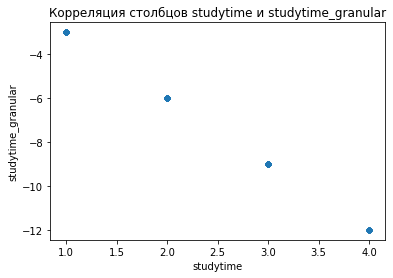

In [528]:
students.plot(x='studytime',
              y='studytime_granular',
              kind='scatter',
              title='Корреляция столбцов studytime и studytime_granular')

Мы видим почти полную отрицательную корреляцию,  
а это значит, что столбец 'studytime_granular' не обладает дополнительной информативностью, удаляем его:

In [529]:
students.drop(['studytime_granular'], inplace=True, axis=1)

## Количественные переменные

## age

In [530]:
students.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [531]:
display(count_val('age'), missing_val('age'))

age
16  104
17   98
18   82
15   82
19   24
20    3
22    1
21    1

Пропущенные значения  % от Общего Числа
столбец                     0                0.0

In [532]:
mid_val('age')

Медиана    Среднее  Мода
0     17.0  16.696203    16

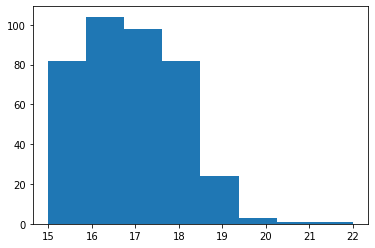

In [533]:
students['age'].hist(bins=8,grid=False)

Похоже на логнормальное распределение, проверим, есть ли выбросы:

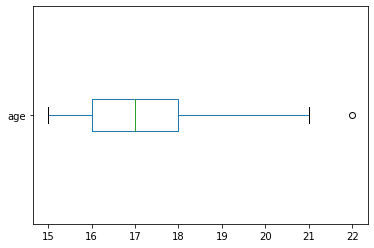

In [534]:
students.boxplot(column=['age'], grid=False, vert=False)

На графике мы видим один выброс на уровне 22 лет. Мы знаем, что 22 летний учащийся в нашей выборке всего один, но все же не хотелось бы отбрасываать его.  
Посчитаем сначала границу выбросов

In [535]:
desc_stat('age')

25-й перцентиль: 16.0 
75-й перцентиль: 18.0 
IQR: 2.0 
Границы выбросов: [13.0, 21.0]


Теперь глядя на границы, мы можем принять, что один представитель этой возрастной категории не будет показателен.  
Отбрасываем значение 22, 21 входит в верхнюю границу - оставляем

In [536]:
students.loc[students['age'] > 21.0, 'age'] = np.nan

In [537]:
# проверим, сместились ли наши показатели
mid_val('age')

Медиана    Среднее  Мода
0     17.0  16.682741  16.0

**Вывод:**  
Пропущенных значений нет. Распределение логнормальное. Датасет не понес потерь после удаления выброса

## absences

In [538]:
students.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [539]:
display(count_val('absences'), missing_val('absences'))

absences
0.0         111
2.0          60
4.0          53
6.0          31
8.0          21
10.0         17
12.0         12
14.0         12
3.0           8
16.0          7
7.0           6
5.0           5
18.0          5
20.0          4
22.0          3
9.0           3
1.0           3
15.0          2
13.0          2
11.0          2
25.0          1
54.0          1
385.0         1
26.0          1
56.0          1
24.0          1
212.0         1
21.0          1
75.0          1
30.0          1
19.0          1
38.0          1
40.0          1
23.0          1
17.0          1
28.0          1

Пропущенные значения  % от Общего Числа
столбец                    12           3.037975

In [540]:
mid_val('absences')

Медиана   Среднее  Мода
0      4.0  7.279373   0.0

Text(0.5, 1.0, 'Распределение пропущеных занятий')

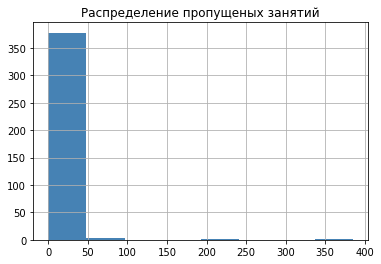

In [541]:
students.absences.hist(bins = 8, color = 'steelblue')
plt.title('Распределение пропущеных занятий')

Мы видим, что подавляющее большинство занятия не пропускает или пропускает минимально.  
Есть огромные показатели как 212 и 385 (они влияют и на распределение и на средние:реднее = 7.3 при медиане = 4)  
В Японии один из самых длинных про продолжительности учебный год, длится он 45 недель. А это 315 дней.  
В России самый длинный учебный год составляет 37 недель, а это 259 дней.
Так что, очевидно, мы имеем дело с выбросами. Давайте разберемся

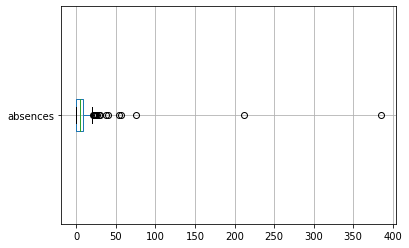

In [542]:
students.boxplot(column=['absences'], vert=False)

In [543]:
desc_stat('absences')

25-й перцентиль: 0.0 
75-й перцентиль: 8.0 
IQR: 8.0 
Границы выбросов: [-12.0, 20.0]


In [544]:
students.loc[students['absences'] > 100.0, 'absences'] = np.nan

Мы удалили только очевидные выбросы, давайте теперь проверим, как выглядят наши средние

In [545]:
mid_val('absences')

Медиана   Среднее  Мода
0      4.0  5.750656   0.0

Text(0.5, 1.0, 'Распределение пропущеных занятий')

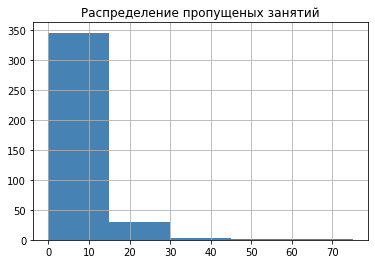

In [546]:
students.absences.hist(bins = 5, color = 'steelblue')
plt.title('Распределение пропущеных занятий')

**Вывод:**  
Большинство учащихся не пропускают занятия
После удаления выбросов у нас логнормальное распределение пропущенных занятий
Процент пропущенных значений составляет лишь 3%, будем его игнорировать

## score

In [547]:
students.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [548]:
display(count_val('score'))
display(missing_val('score'))

score
50.0      54
55.0      46
0.0       37
75.0      33
65.0      31
40.0      31
60.0      31
70.0      27
45.0      27
80.0      16
30.0      15
90.0      12
35.0       9
25.0       7
85.0       6
95.0       5
100.0      1
20.0       1

Пропущенные значения  % от Общего Числа
столбец                     6           1.518987

In [549]:
mid_val('score')

Медиана    Среднее  Мода
0     55.0  52.262211  50.0

Text(0.5, 1.0, 'Распределение баллов по экзамену')

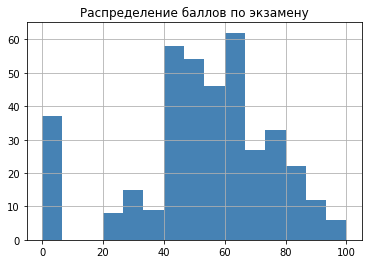

In [550]:
students.score.hist(bins = 15, color = 'steelblue')
plt.title('Распределение баллов по экзамену')

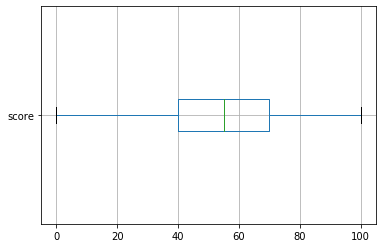

In [551]:
students.boxplot(column=['score'], vert=False)

Пропущенных значений всего 1.5%, их можно игнорировать.
Но вызывает подозрение большое количество нулевых результатов по экзаменам: выглядят как выбросы.  
Однако при этом у нас хорошие показатели средних величин

In [552]:
students.loc[students['score'] == 0.0, 'score'] = np.nan

In [553]:
mid_val('score')

Медиана    Среднее  Мода
0     55.0  57.755682  50.0

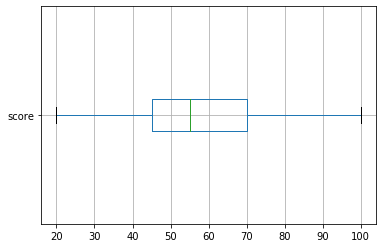

In [554]:
students.boxplot(column=['score'], vert=False)

По диаграмме boxplot мы видим что границы и медиана не сместились (среднее, нижняя граница IQR и 25й квартиль поднялись)

Пропущенные значения  % от Общего Числа
столбец                    43          10.886076

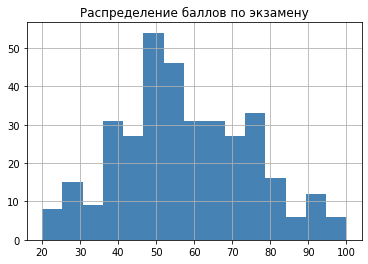

In [555]:
students.score.hist(bins = 15, color = 'steelblue')
plt.title('Распределение баллов по экзамену')
display(missing_val('score'))

**Вывод:**  
Мы увеличили количество пропущенных значений, подняв их содержание до ≈11%,  
но теперь мы видим, что наша целевая переменная распределена нормально.  
Большая часть учащихся набирает лишь половину баллов

## Анализ номинативных переменных

## school

school
GP     349
MS      46

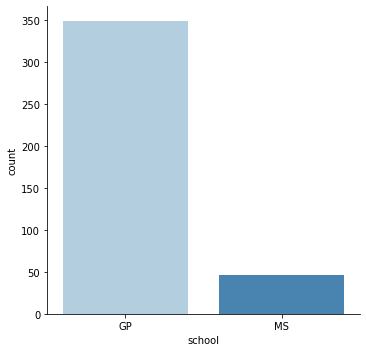

In [556]:
display(count_val('school'))
sns.catplot(x="school", kind="count", palette="Blues", data=students, margin_titles=True)

In [557]:
missing_val('school')

Пропущенные значения  % от Общего Числа
столбец                     0                0.0

**Вывод:**  
Нам предоставлены данные с двух школ, количество студентов школы GP в датасете значительно превышает студентов MS.  
Пропущенных значений нет. Сложно сказать, полезны ли нам такие данные при анализе. Будем подробнее смотреть при анализе

## sex

sex
F  208
M  187

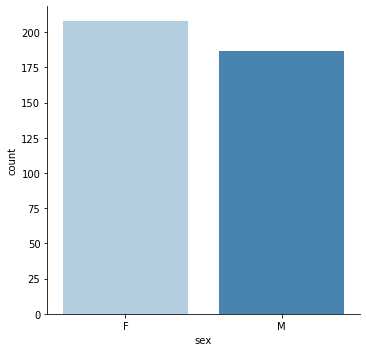

In [558]:
display(count_val('sex'))
sns.catplot(x="sex", kind="count", palette="Blues", data=students)

In [559]:
missing_val('sex')

Пропущенные значения  % от Общего Числа
столбец                     0                0.0

**Вывод:**  
Признак распределен относительно равномерно, что дает нам впоследствии предположить,  
есть ли взаимосвязь между полом и успеваемостью по математике (скорее всего, нет)  
Пропущенных значений нет.

## address

address
U      295
R       83

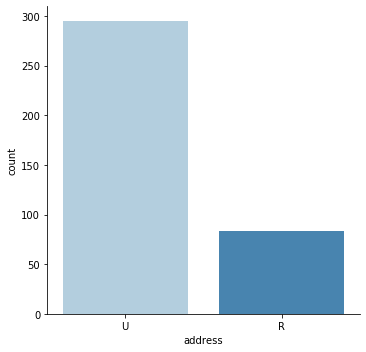

In [560]:
display(count_val('address'))
sns.catplot(x="address", kind="count", palette="Blues", data=students)

In [561]:
missing_val('address')

Пропущенные значения  % от Общего Числа
столбец                    17           4.303797

**Вывод:**  
Большинство учеников живет в городе.  
Пропущенных значений 17, что составляет 4.3%.  
Мы могли бы заполнить пропущенные значения модой, но так как мы не можем быть уверены, повлияет ли это на другие параметры, мы будем пропущенные значения игнорировать

## famsize

famsize
GT3      261
LE3      107

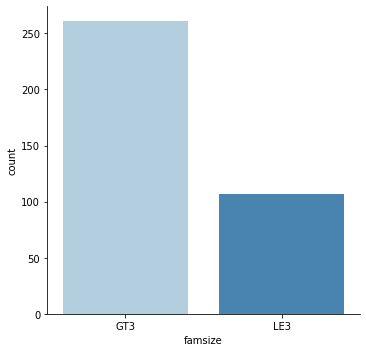

In [562]:
display(count_val('famsize'))
sns.catplot(x="famsize", kind="count", palette="Blues", data=students)

In [563]:
missing_val('famsize')

Пропущенные значения  % от Общего Числа
столбец                    27           6.835443

**Вывод:**  
Пропусков уже 6.8%, но предугадать заполнение сложно, оставляем их как есть   
Удивлена, что семьи с 4 и более членами значительно превосходят меньшие по размеру

## p_status

p_status
T       314
A        36

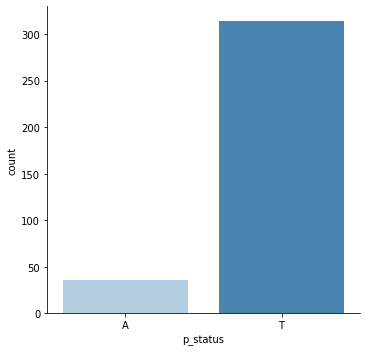

In [564]:
display(count_val('p_status'))
sns.catplot(x="p_status", kind="count", palette="Blues", data=students)

In [565]:
missing_val('p_status')

Пропущенные значения  % от Общего Числа
столбец                    45          11.392405

**Вывод:**  
11.3% пропущенных значений - это уже неприятно, однако учитывая большую диспропорцию между признаками (полные семьи превышают почти в 9 раз неполные) можно предположить, что на данные и расчеты этот фактор не повлияет сильно.  
Отрадно, что большинство учеников из полных семей  

## m_edu

m_edu
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3

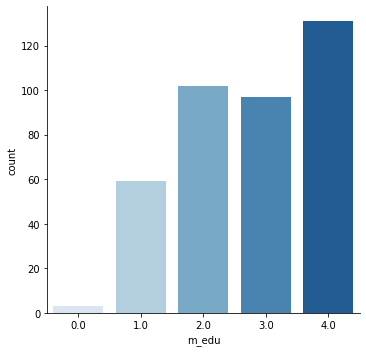

In [566]:
display(count_val('m_edu'))
sns.catplot(x="m_edu", kind="count", palette="Blues", data=students)

In [567]:
missing_val('m_edu')

Пропущенные значения  % от Общего Числа
столбец                     3           0.759494

**Вывод:**  
Пропущенных значений всего три,будем их игнорировать  
Распределение похоже на логнормальное (но я не уверена, считается ли оно таким при номинативных переменных)  
Матерей с высшим образованием - уверенное большинство

 ## f_edu

f_edu
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1

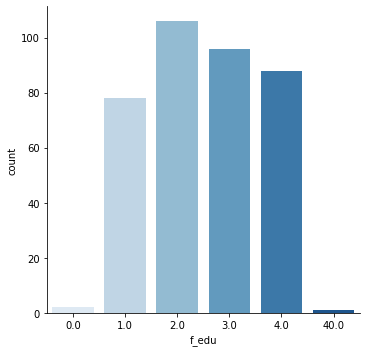

In [568]:
display(count_val('f_edu'))
sns.catplot(x="f_edu", kind="count", palette="Blues", data=students)

Здесь видна явная опечатка, преобразуем 40.0 в 4.0

In [569]:
students.loc[students['f_edu'] == 40.0, 'f_edu'] = 4.0

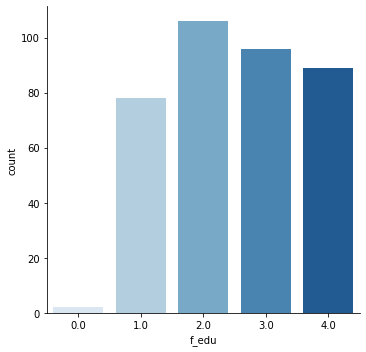

In [570]:
sns.catplot(x="f_edu", kind="count", palette="Blues", data=students)

In [571]:
missing_val('f_edu')

Пропущенные значения  % от Общего Числа
столбец                    24           6.075949

**Вывод:**  
Не считая 0 признак, распределение отцов с разным уровнем образования относительно равномерно.  
Пропущенных значений больше в 8 раз чем в аналогичном столбце для матерей. Мы не будем их удалять или преобразовывать, так как пока не можем предугадать как это повлияет на датасет
У отцов меньший отрыв у лидера - людей со средним образованием.

## m_job

m_job
other       133
services     98
at_home      58
teacher      55
health       32

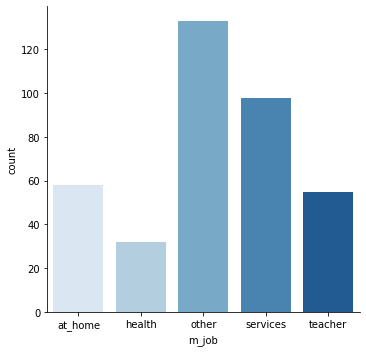

In [572]:
display(count_val('m_job'))
sns.catplot(x="m_job", kind="count", palette="Blues", data=students)

In [573]:
missing_val('m_job')

Пропущенные значения  % от Общего Числа
столбец                    19           4.810127

**Вывод:**  
Пропущенных значений относительно немного, будем их игнорировать, ввиду невозможности преобразовать  
Большинство сфер работ матерей выборкой не охватывается, из известных нам: матери больше всего задействованы в сфере обслуживания, меньше всего - в сфере здравоохранения

f_job
other       197
services    102
teacher      29
at_home      16
health       15

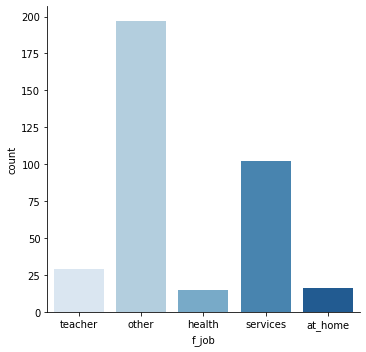

In [574]:
display(count_val('f_job'))
sns.catplot(x="f_job", kind="count", palette="Blues", data=students)

In [575]:
missing_val('f_job')

Пропущенные значения  % от Общего Числа
столбец                    36           9.113924

**Вывод:**  
У отцов снова больше пропущенных значений, и по прежней причине мы их трогать не будем
У отцов складывается такая же картина как у матерей: большинство работ не охватывается, помимо в сфере обслуживания занято самое большое количество отцов, в сфере здравоохранения - самое меньшее.

## reason

reason
course         137
home           104
reputation     103
other           34

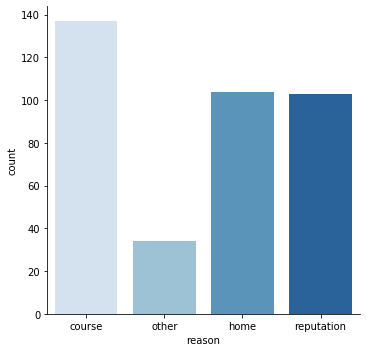

In [576]:
display(count_val('reason'))
sns.catplot(x="reason", kind="count", palette="Blues", data=students)

In [577]:
missing_val('reason')

Пропущенные значения  % от Общего Числа
столбец                    17           4.303797

**Вывод:**  
Заполнить пропущенные значения не представляется возможным, так как мы еще не знаем коэффициент корреляции (с целевой переменной) и не можем быть уверены, что качество датасета не пострадает после удаления строк с пропусками или рандомного их заполнения
Основными причнами выбора школы у учеников являются (по нисходящей): образовательная программа, близость к дому и репутация школы.

## guardian

guardian
mother       250
father        86
other         28

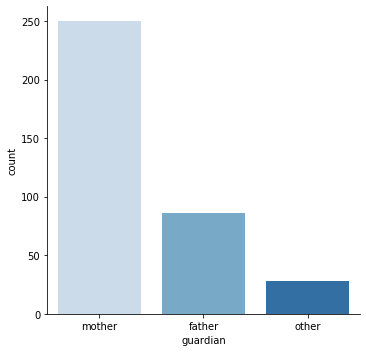

In [578]:
display(count_val('guardian'))
sns.catplot(x="guardian", kind="count", palette="Blues", data=students)

In [579]:
missing_val('guardian')

Пропущенные значения  % от Общего Числа
столбец                    31           7.848101

**Вывод:**  
Пропущенных значений 31, что составляет 7.8% от общего числа. Можно было бы поискать зависимость между этим параметром и статусом совместного жилья родителей и заполнить пропуски соответствующе. JОднако мне NaN значения мешают посчитать корреляцию.  
Ожидаемо, матери превосходят в количестве по статусу опекунства

## traveltime

traveltime
1.0         242
2.0          96
3.0          22
4.0           7

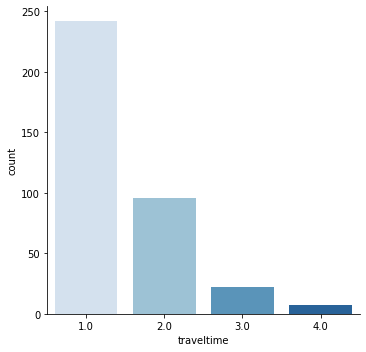

In [580]:
display(count_val('traveltime'))
sns.catplot(x="traveltime", kind="count", palette="Blues", data=students)

In [581]:
missing_val('traveltime')

Пропущенные значения  % от Общего Числа
столбец                    28           7.088608

Этот столбец мы можем привести в бинарный вид, так как разрыв между 1 категорий с остальными очень большой  
Значениями 'yes' будет время до школы, занимающее меньше 15 минут, остальное - 'no'

In [582]:
students['traveltime'] = students['traveltime'].apply(lambda x: 'yes' if x > 1
                                                      else 'no')

## studytime

studytime
2.0        194
1.0        103
3.0         64
4.0         27

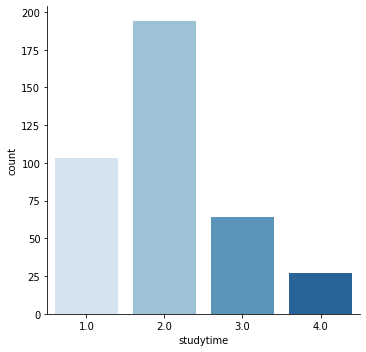

In [583]:
display(count_val('studytime'))
sns.catplot(x="studytime", kind="count", palette="Blues", data=students)

In [584]:
missing_val('studytime')

Пропущенные значения  % от Общего Числа
столбец                     7           1.772152

**Вывод:**  
Хорошие показатели по учебе, большинство детей тратят на учебу вне школы среднее количество времени, при этом те, кто тратит наименьшее количество - на втором месте
Пропущенных значений достаточно мало, можем их игнорировать

## failures

failures
0.0       293
1.0        49
2.0        16
3.0        15

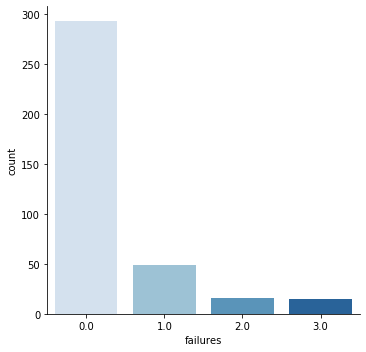

In [585]:
display(count_val('failures'))
sns.catplot(x="failures", kind="count", palette="Blues", data=students)

In [586]:
missing_val('failures')

Пропущенные значения  % от Общего Числа
столбец                    22            5.56962

**Вывод:**  
Этот столбец мы по аналогии с 'traveltime' не можем привести в бинарный вид, так как под значением 0 скрываются значения как и больше трех внеучебных неудач, но так и нулевые  
Процент пропущенных значений позволяет нам его игнорировать

## famrel

famrel
 4.0     182
 5.0      99
 3.0      62
 2.0      17
 1.0       7
-1.0       1

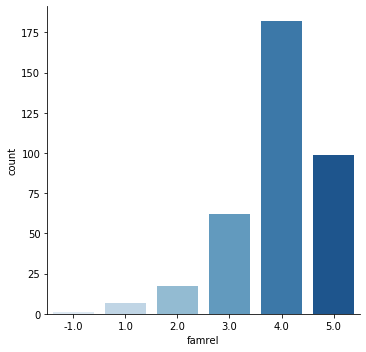

In [587]:
display(count_val('famrel'))
sns.catplot(x="famrel", kind="count", palette="Blues", data=students)

In [588]:
missing_val('famrel')

Пропущенные значения  % от Общего Числа
столбец                    27           6.835443

**Вывод:**  
Пропущенные значения по аналогии с предыдущими будем игнорировать  
Отрадно видеть, что в большей части семей хорошие отношения. Будет отлично, если найдем прямую связь с оценками по математике

## freetime

freetime
3.0       153
4.0       112
2.0        63
5.0        38
1.0        18

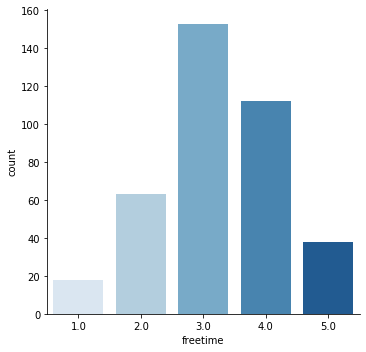

In [589]:
display(count_val('freetime'))
sns.catplot(x="freetime", kind="count", palette="Blues", data=students)

In [590]:
display(missing_val('freetime'))

Пропущенные значения  % от Общего Числа
столбец                    11            2.78481

**Вывод:**  
Распределение свободного времени по учащимся нормальное.
У большинства учеников умеренное количество свободного времени

## go_out

go_out
3.0     127
2.0     101
4.0      84
5.0      52
1.0      23

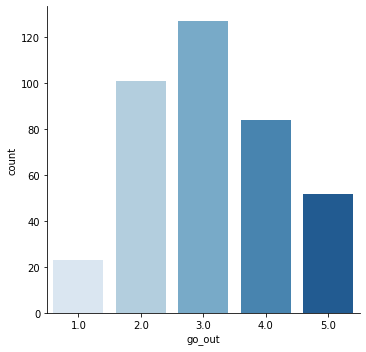

In [591]:
display(count_val('go_out'))
sns.catplot(x="go_out", kind="count", palette="Blues", data=students)

In [592]:
display(missing_val('go_out'))

Пропущенные значения  % от Общего Числа
столбец                     8           2.025316

**Вывод:** 
Распределение временипрепровождения с друзьями также нормальное. Пропущенных значений всего 2% от общего количества  
Большинство учащихся тратят умеренное количество времени на друзей

## health

health
5.0     138
3.0      89
4.0      63
1.0      47
2.0      43

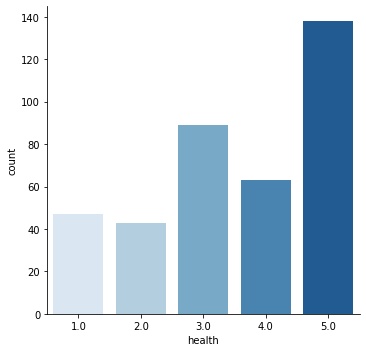

In [593]:
display(count_val('health'))
sns.catplot(x="health", kind="count", palette="Blues", data=students)

In [594]:
display(missing_val('health'))

Пропущенные значения  % от Общего Числа
столбец                    15           3.797468

**Вывод:**  
Пропущенных значений 3.8%, недостаточно велико, чтобы мы задумались, что с ними делать  
Отрадно, что у подавляющего количество учащихся здоровье "от умеренного и выше"

## Бинарные столбцы

Преобразуем наши бинарные данные: мы просто заменим значение NaN на None

In [595]:
students[binary].where(students.notnull(), None)

schoolsup famsup  paid activities nursery higher internet romantic  \
0         yes     no    no         no     yes    yes     None       no   
1          no    yes    no         no      no    yes      yes       no   
2         yes     no  None         no     yes    yes      yes     None   
3          no    yes   yes        yes     yes    yes      yes      yes   
4          no    yes   yes         no     yes    yes       no       no   
..        ...    ...   ...        ...     ...    ...      ...      ...   
390        no    yes   yes         no     yes    yes       no       no   
391        no     no    no         no      no    yes      yes       no   
392      None     no    no         no      no   None       no       no   
393        no     no    no       None      no    yes      yes       no   
394      None     no    no         no     yes    yes      yes       no   

    traveltime  
0          yes  
1           no  
2           no  
3           no  
4           no  
..         ...  
390         no  
391        yes  
392         no  
393        yes  
394         no  

[395 rows x 9 columns]

In [596]:
missing_table(students[binary])

Missing Values  % of Total Values
schoolsup                9           2.278481
famsup                  39           9.873418
paid                    40          10.126582
activities              14           3.544304
nursery                 16           4.050633
higher                  20           5.063291
internet                34           8.607595
romantic                31           7.848101
traveltime               0           0.000000

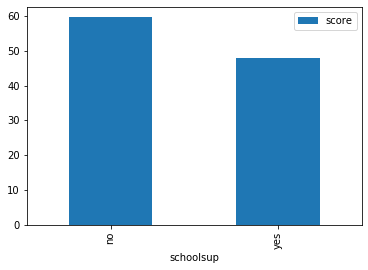

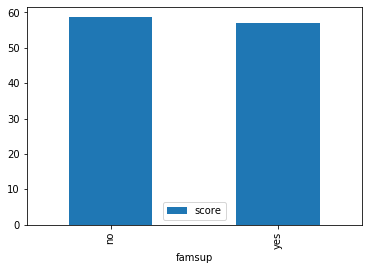

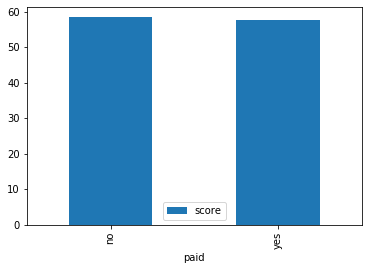

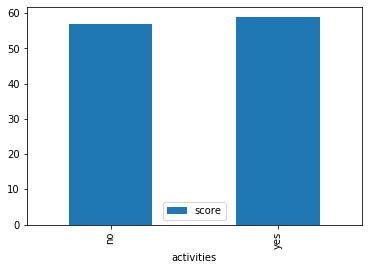

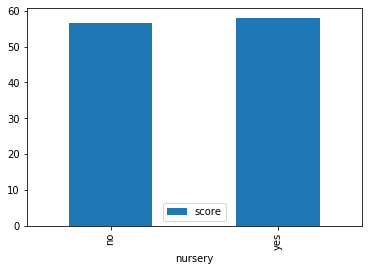

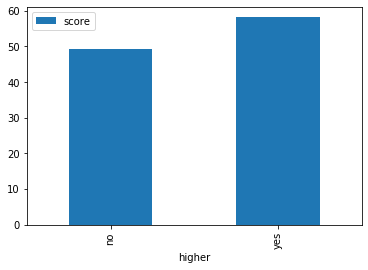

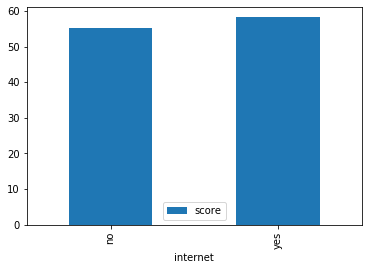

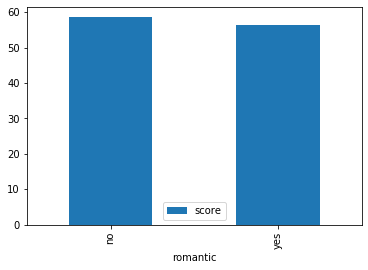

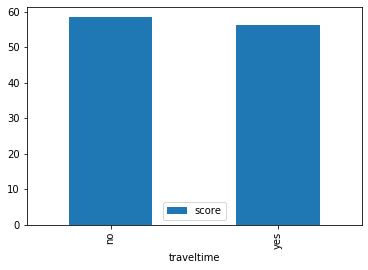

In [597]:
for col in binary:
    t = students.pivot_table(values=['score'],
                             index=col,
                             aggfunc='mean').plot(kind='bar')
plt.show()

**Вывод:**  
Мы видим, что почти все бинарные переменные распределены относительно целевой переменной (ее среднего) равномерно.  
Удивило, что учащиеся с дополнительной образовательной поддержкой в среднем справляются с экзаменами хуже остальных.  
Ожидаемая прямая зависимость видна в отношении столбца higher

## Корелляционный анализ количественных переменных

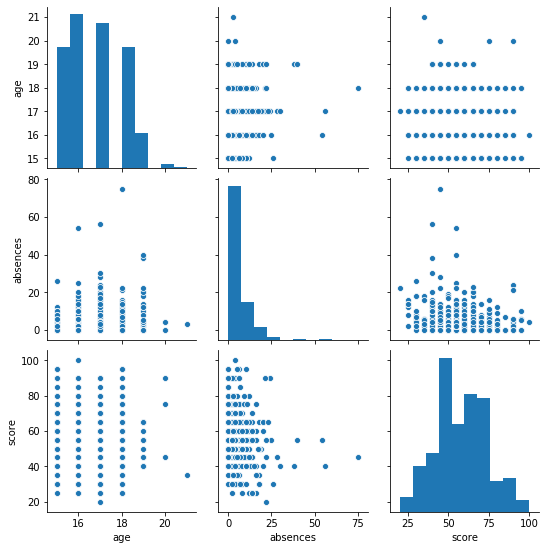

In [598]:
sns.pairplot(students[quantitative])

In [599]:
students[quantitative].corr()

age  absences     score
age       1.000000  0.156766 -0.121579
absences  0.156766  1.000000 -0.214926
score    -0.121579 -0.214926  1.000000

**Вывод:**  
Коэффициенты корреляции показали связки absences - score (обратная зависимость),age - absences(прямая) обратная age - score.

## Анализ номинативных переменных

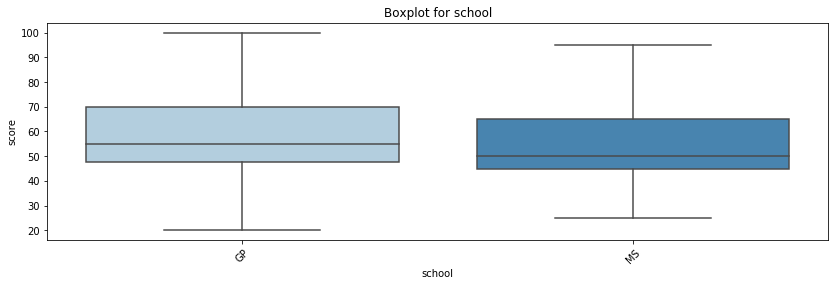

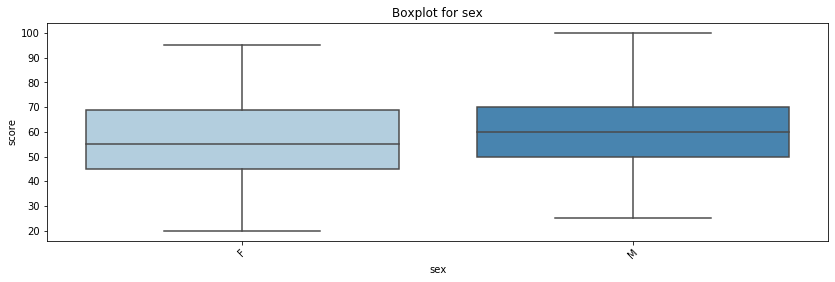

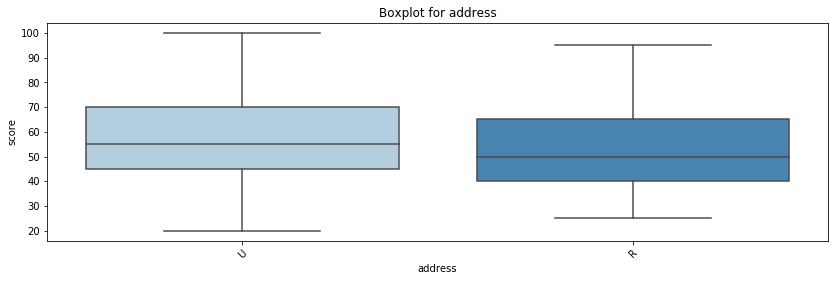

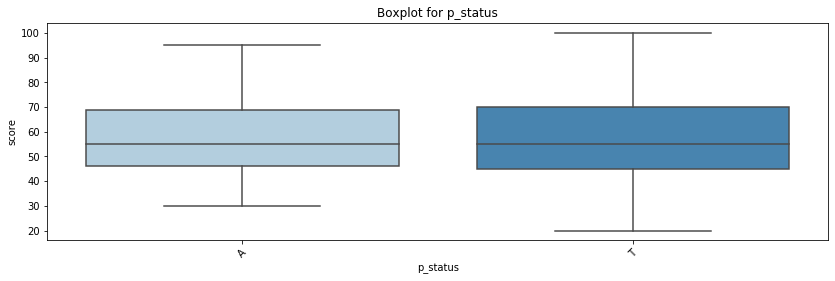

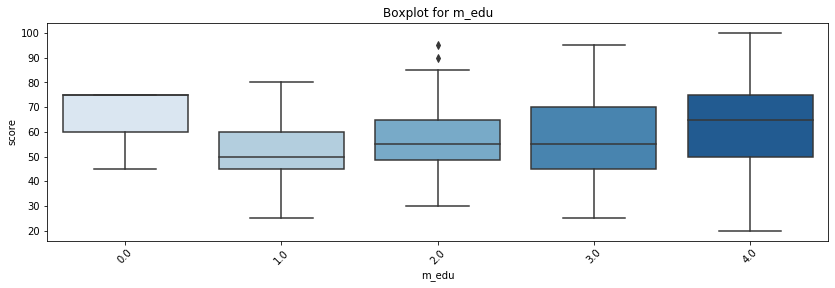

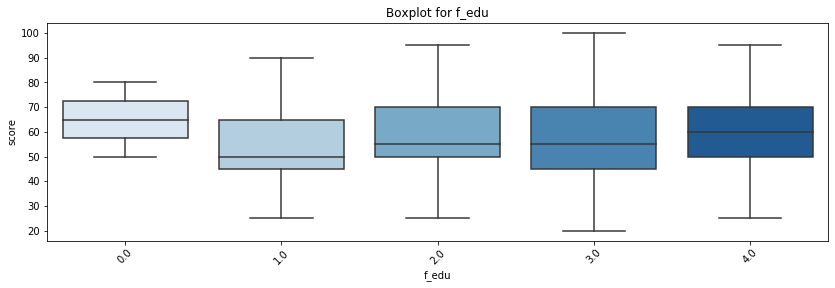

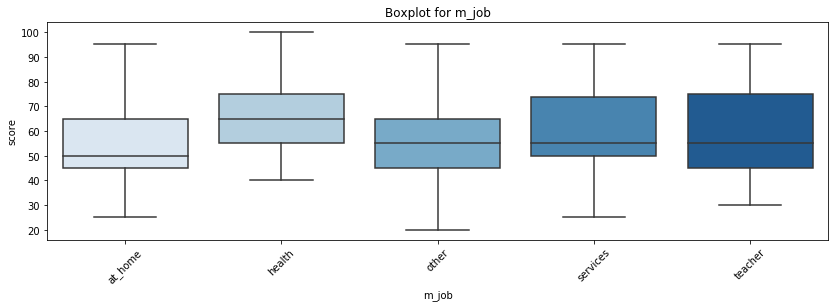

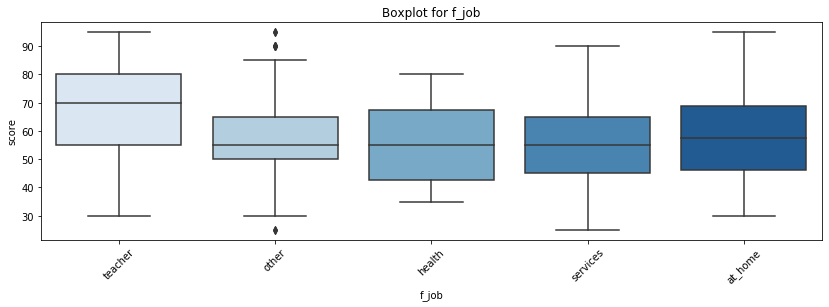

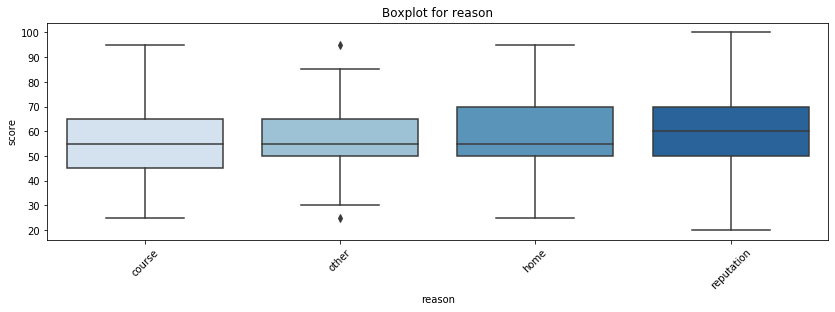

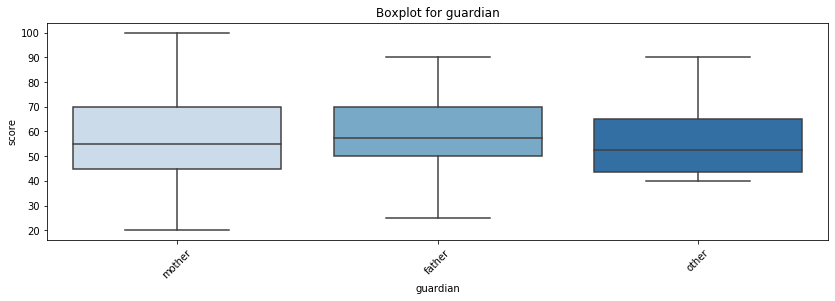

In [600]:
for col in categorical:
    get_boxplot(col)

In [601]:
for col in categorical:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job


**Вывод:**  
Среди номинативных путем анализа выделены самые значимые переменные: address, m_edu, f_edu, m_job

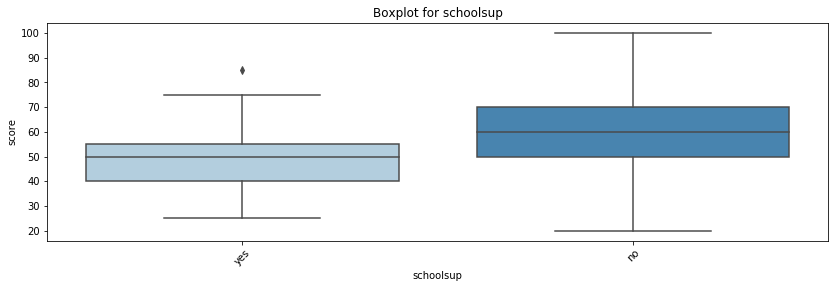

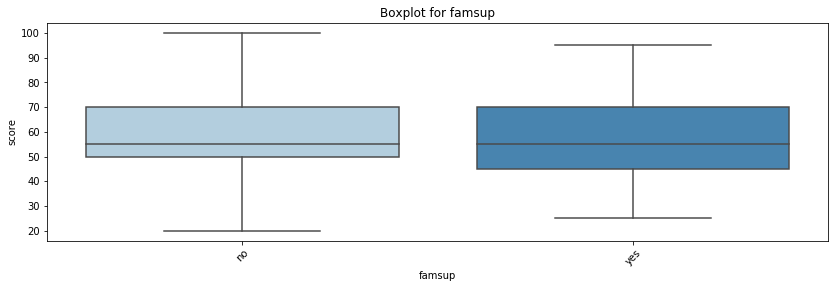

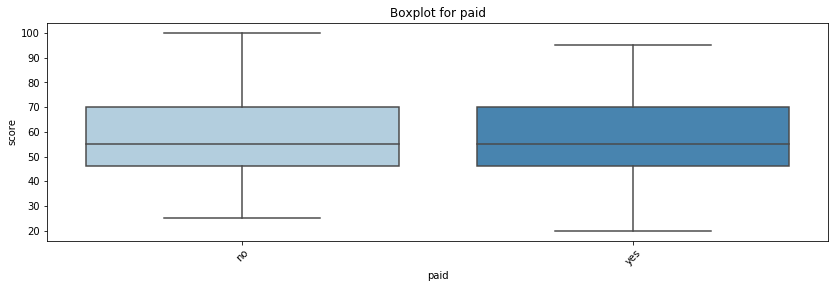

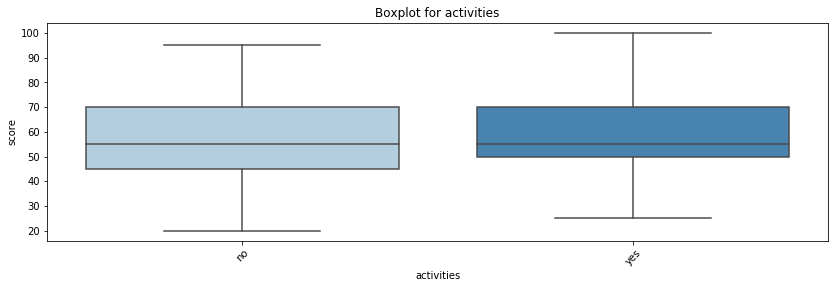

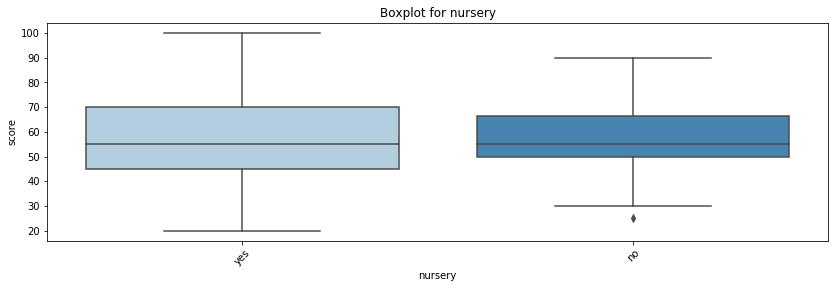

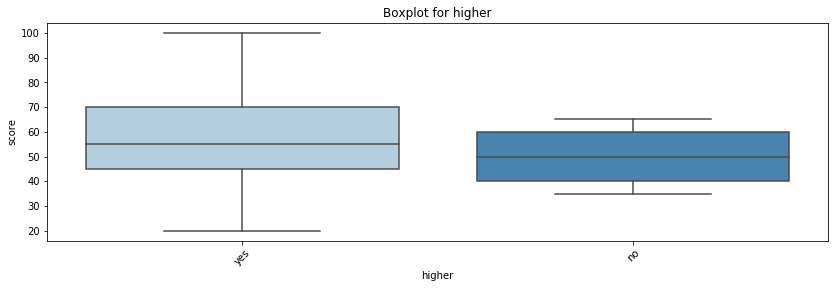

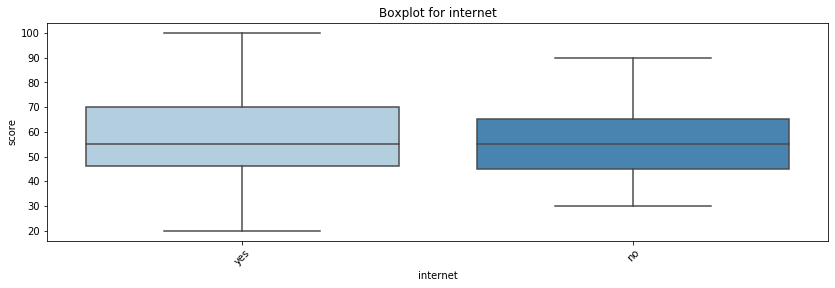

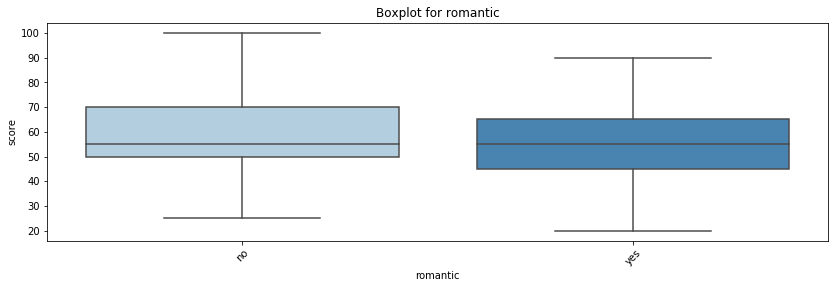

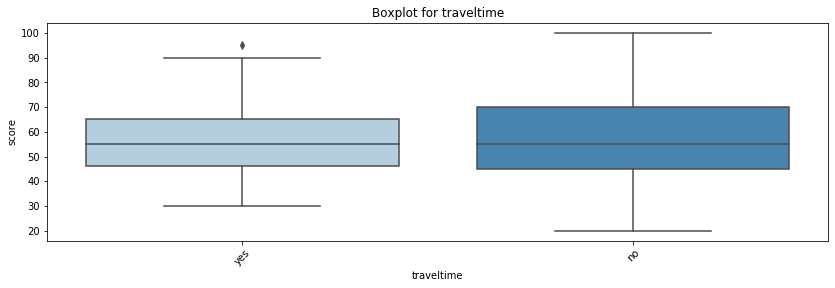

In [602]:
for col in binary:
    get_boxplot(col)

In [603]:
for col in binary:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher


**Вывод:**  
Среди бинарных путем анализа выделены самые значимые переменные: schoolsup и higher

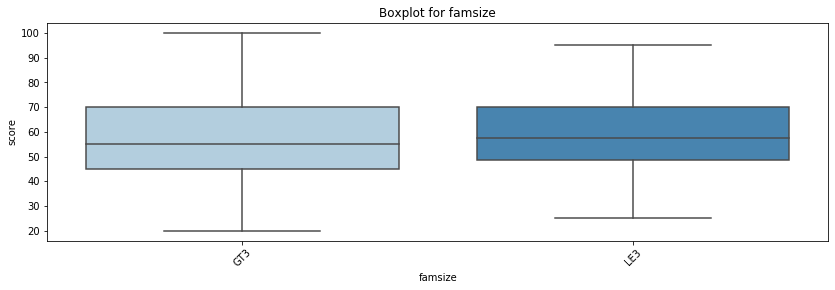

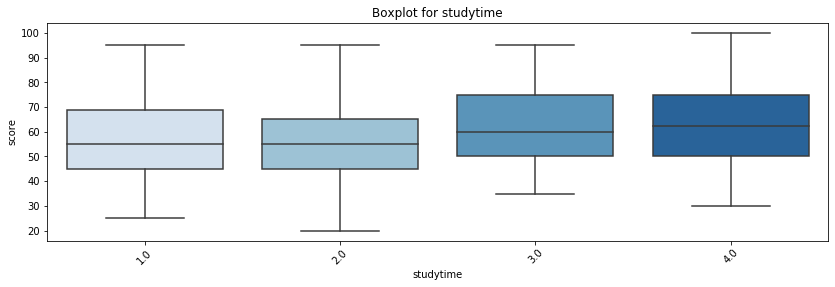

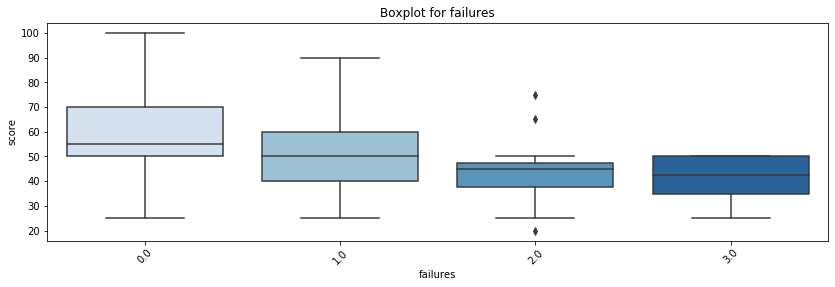

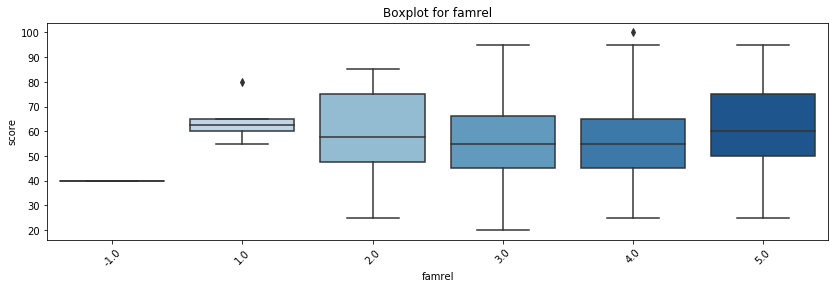

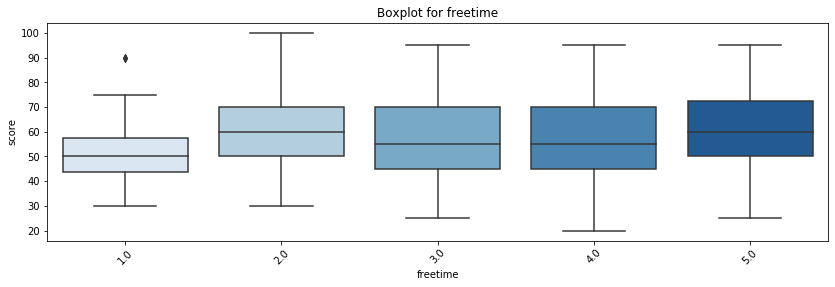

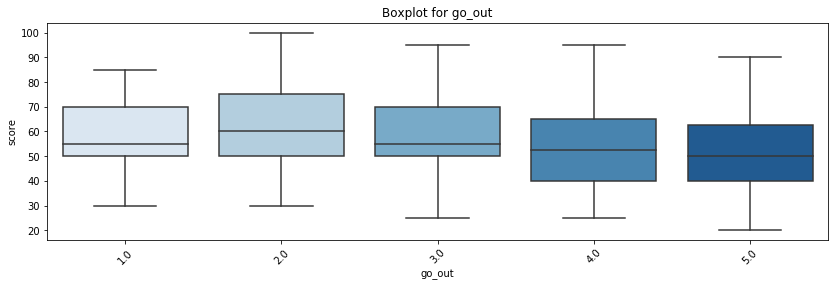

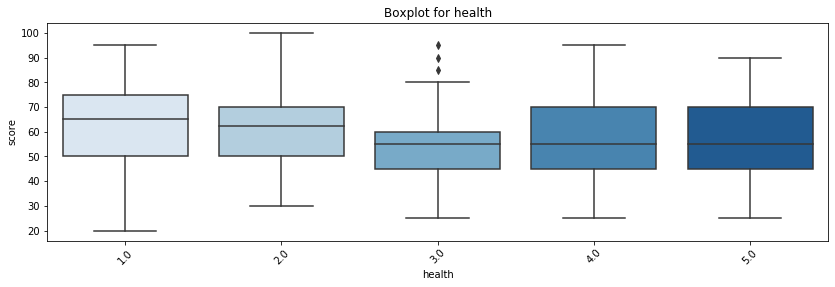

In [604]:
for col in ordinal:
    get_boxplot(col)

In [605]:
for col in ordinal:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки go_out


C:\Users\assem\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\assem\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\assem\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\assem\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\assem\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


**Вывод:**  
Среди ранговых путем анализа выделены самые значимые переменные: studytime, failures, go_out

## Выводы

In [606]:
model_variables = students[['age', 'absences', 'address', 'm_edu', 'f_edu',
                            'm_job', 'schoolsup', 'higher', 'score', 'studytime', 'failures', 'go_out']]
model_variables.head()

age  absences address  m_edu  f_edu    m_job schoolsup higher  score  \
0  18.0       6.0       U    4.0    4.0  at_home       yes    yes   30.0   
1  17.0       4.0       U    1.0    1.0  at_home        no    yes   30.0   
2  15.0      10.0       U    1.0    1.0  at_home       yes    yes   50.0   
3  15.0       2.0       U    4.0    2.0   health        no    yes   75.0   
4  16.0       4.0       U    3.0    3.0    other        no    yes   50.0   

   studytime  failures  go_out  
0        2.0       0.0     4.0  
1        2.0       0.0     3.0  
2        2.0       3.0     2.0  
3        3.0       0.0     2.0  
4        2.0       0.0     2.0

Среди **числовых** показателей наибольшую корреляцию показывает связь absences - score. Тут ожидаемая обратная зависимость.  
Следующей идет связка age - absences. Чем старше ученик, тем чаще прогуливает.  
И последней идет связка age - score. Тут чем младше ученик, тем лучше он сдает экзамен.

Однако мы должны помнить, что коэффициенты корреляции очень малы, чтобы делать такие поспешные выводы.  
При построении модели следует учитывать только связку absences - score как наибольшую


Среди **номинативных** переменных я рекомендую рассматривать прежде всего столбцы address и m_edu исходя из ттеста и диаграмм bloxpot.  
Оценить важность уровня образования родителей и географического местоположения школы может нам помочь при составлении учебных программ, выборе места для строительства школ
f_edu все же довольно ровно распределен, но в связке с образованием матери, будет полезно рассмотреть и влияние уровня образования отца  

m_job не советую включать при построении модели, так как это очень плавающая переменная. Место работы меняют, или могут иметь их несколько


В случае **бинарных** переменных согласна с выводом теста Стьюдента.  
Однако, возможно, я бы еще посоветовала рассмотреть показатель наличия интернета. Но, по всей видимости, положительное его влияние на учебу размывается его возможностями для самого разного времяпрепровождения

Среди **ранговых** переменных интереснее всего показатель studytime, он не однозначный, но если связь между хорошей успеваемостью и тратой на учебу во внеурочное время ниже среднего - будет забавный вывод, который лишний раз покажет, что мозг не надо загружать постоянно